In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("Thyroid_Diff.csv")

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [6]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [7]:
df.duplicated().sum()

19

prefer not to remove duplicates because it may represent other real patients with same info

No missing values

In [10]:
gender_distribution = df['Gender'].value_counts(normalize = True) * 100
gender_distribution

Gender
F    81.462141
M    18.537859
Name: proportion, dtype: float64

Majority of thyroid cancer patients were females (81%).

In [12]:
df.Smoking.value_counts()

Smoking
No     334
Yes     49
Name: count, dtype: int64

C:\Users\start\AppData\Local\Temp\ipykernel_2840\431760346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Smoking", data=df, palette="coolwarm")


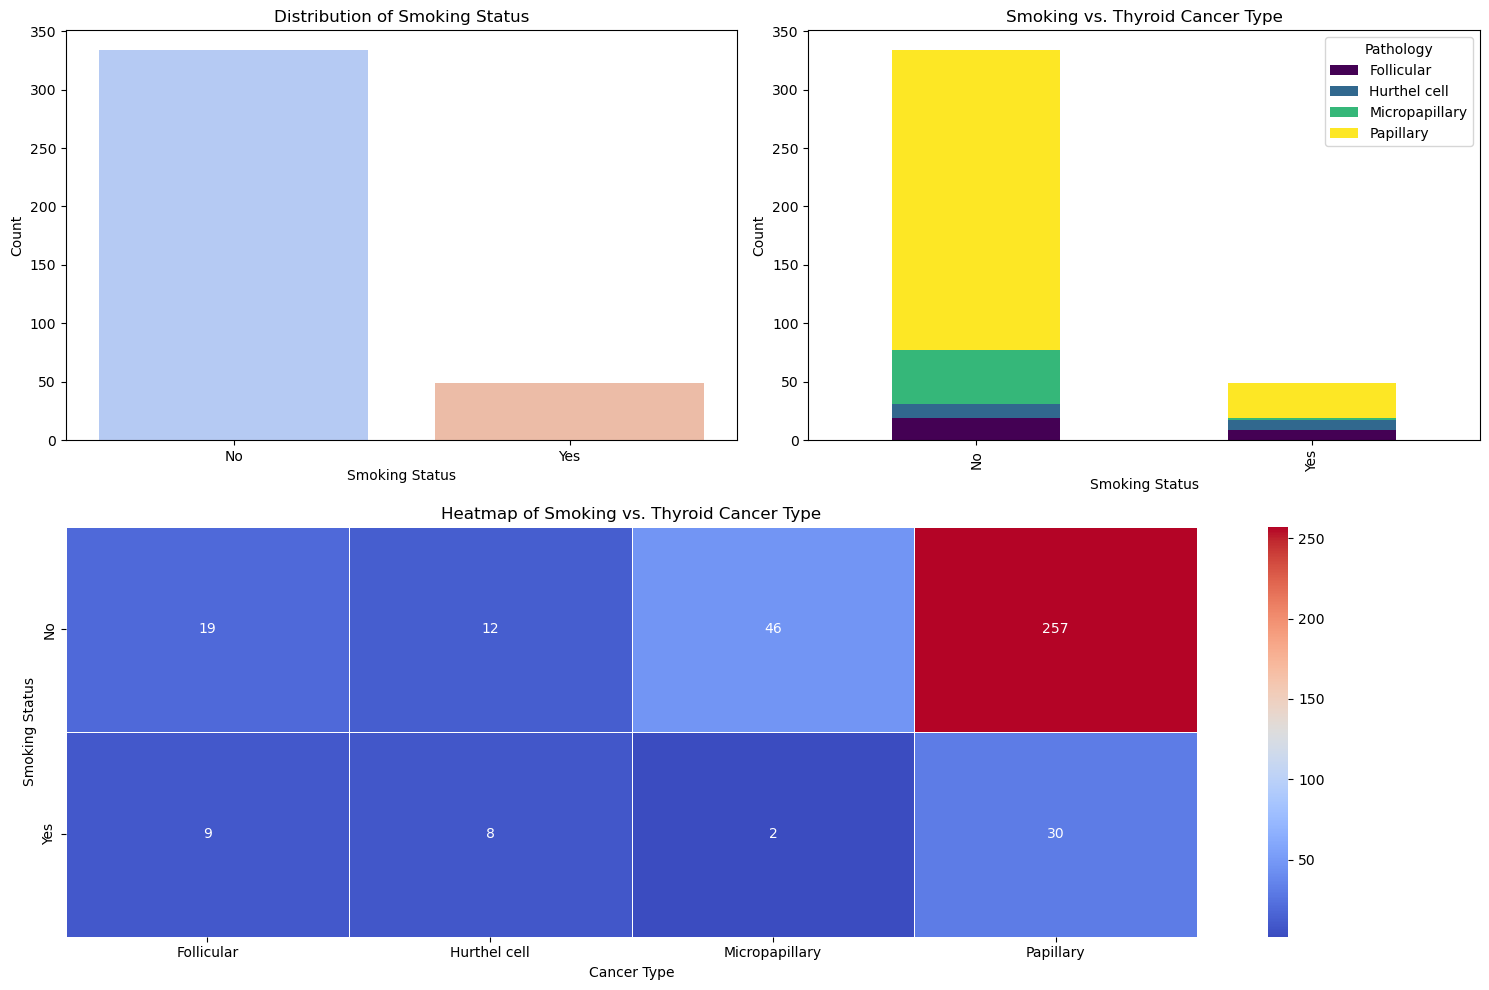

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x="Smoking", data=df, palette="coolwarm")
plt.title("Distribution of Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")


plt.subplot(2, 2, 2)
smoking_vs_pathology = pd.crosstab(df["Smoking"], df["Pathology"])
smoking_vs_pathology.plot(kind="bar", stacked=True, colormap="viridis", ax=plt.gca())
plt.title("Smoking vs. Thyroid Cancer Type")
plt.xlabel("Smoking Status")
plt.ylabel("Count")

plt.subplot(2, 1, 2)
sns.heatmap(smoking_vs_pathology, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Smoking vs. Thyroid Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Smoking Status")


plt.tight_layout()
plt.show()

It seems that Somking and Smoking history don't have much impact of being diagnosed by thyroid cancer

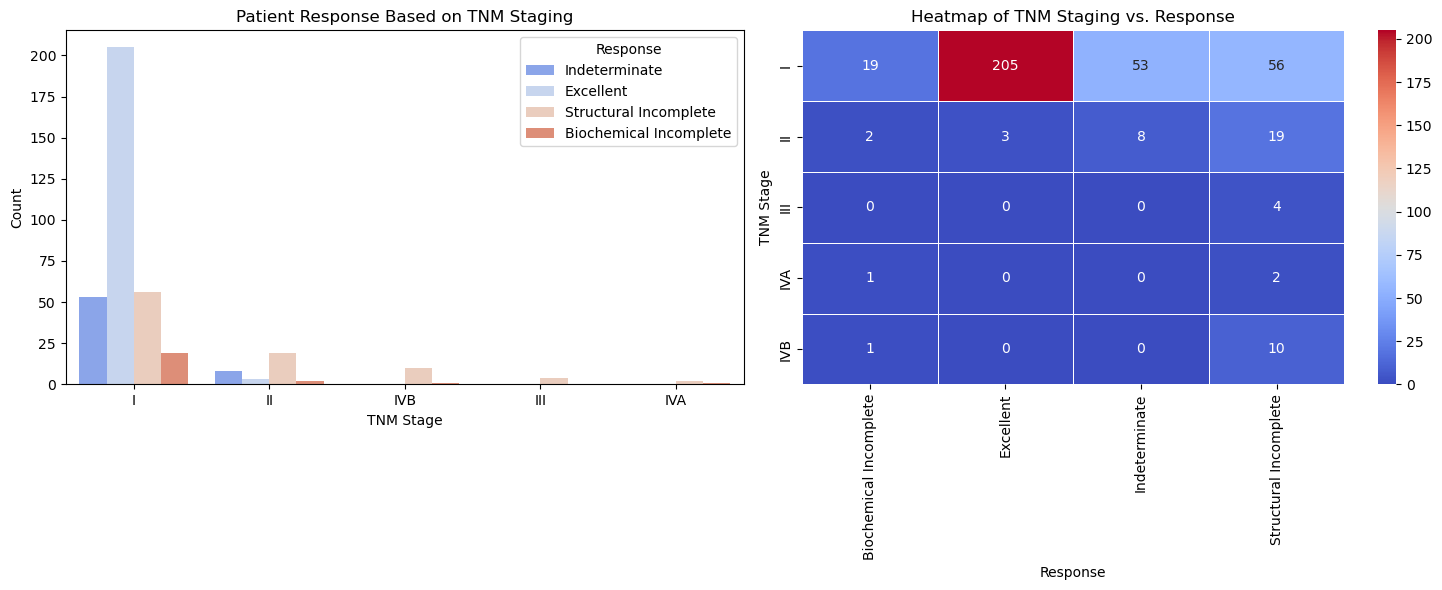

In [15]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x="Stage", hue="Response", data=df, palette="coolwarm")
plt.title("Patient Response Based on TNM Staging")
plt.xlabel("TNM Stage")
plt.ylabel("Count")
plt.legend(title="Response")


plt.subplot(1, 2, 2)
stage_vs_response = pd.crosstab(df["Stage"], df["Response"])
sns.heatmap(stage_vs_response, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of TNM Staging vs. Response")
plt.xlabel("Response")
plt.ylabel("TNM Stage")

plt.tight_layout()
plt.show()


Text(158.22222222222223, 0.5, 'Pathology')

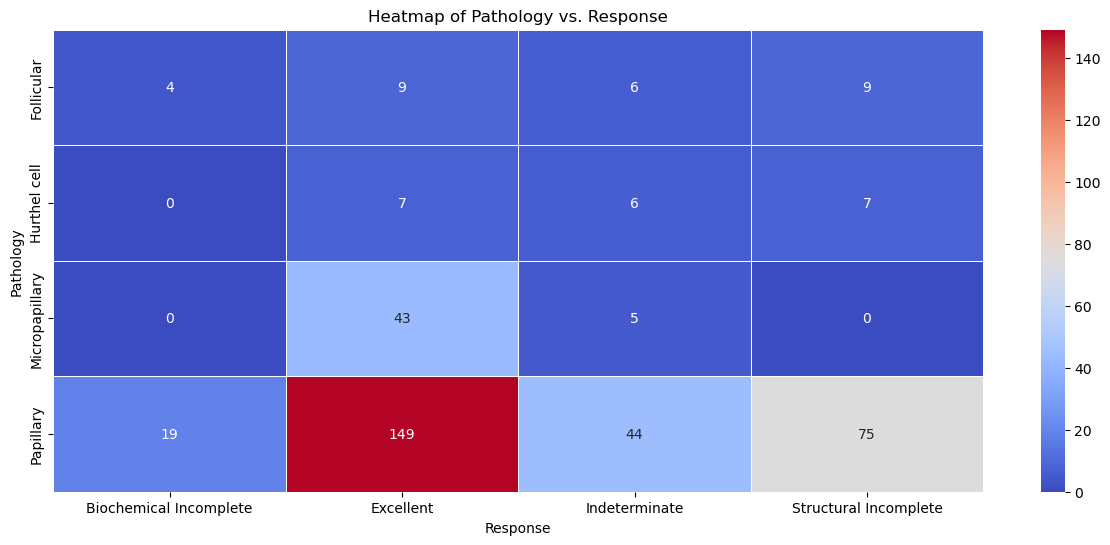

In [16]:
plt.figure(figsize=(15, 6))
pathology_vs_response = pd.crosstab(df["Pathology"], df["Response"])
sns.heatmap(pathology_vs_response, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Pathology vs. Response")
plt.xlabel("Response")
plt.ylabel("Pathology")

Papillary is the most common type and it's most probably to be recovered from

In [18]:
df.Recurred.value_counts(normalize = True) * 100

Recurred
No     71.801567
Yes    28.198433
Name: proportion, dtype: float64

Thyroid cancer didn't recurred for more than 70% of the patients 

Encoding categorical columns for better model performance

In [21]:
categorical_columns = df.drop(df['Age'])
label_encoder = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le

In [23]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,11,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,18,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,14,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,46,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,46,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [45]:
#Ensure No Misalignment 
X = X.dropna() 
y = y.loc[X.index] 

print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Shape of X: (383, 16), Shape of y: (383,)


Logistic Regression

In [47]:
X = df.drop(columns=['Recurred'])  
y = df['Recurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = LogisticRegression(max_iter=500) 
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, clf.predict(X_test_scaled)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")


Logistic Regression model accuracy: 92.21%


K-Nearest Neighbor(KNN) Algorithm

In [53]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train_scaled, y_train)

acc = accuracy_score(y_test, clf.predict(X_test_scaled)) * 100
print(f"K-Nearest Neighbor(KNN) model accuracy: {acc:.2f}%")

K-Nearest Neighbor(KNN) model accuracy: 88.31%
